# Project 9 -Partial Correlations and Directed Acyclic Graphs
## Generating artificial data 

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [26.493765328267255,
  25.195084165100855,
  23.715658158667072,
  28.74866117547714,
  26.754574359040316,
  23.99527706259756,
  22.54375039912129,
  24.95115935722682,
  24.10667829923538,
  23.004683643241997,
  19.683120359487326,
  29.34931761525546,
  22.150739994113035,
  28.926340207301003,
  24.01094929382346,
  25.1754261950505,
  28.338890389174317,
  28.84513590781656,
  20.56700634108432,
  27.068427388667583,
  27.650203526641572,
  24.45538732021779,
  24.05103816564527,
  24.011616591018885,
  24.528976392521102,
  29.722991740339133,
  23.649626240429384,
  29.31923744584909,
  23.91903891696716,
  16.804048632645568,
  27.570219039719245,
  22.914719869693158,
  25.38877334894633,
  21.657763063402463,
  24.802029305115454,
  28.063238126747912,
  24.099242125284384,
  21.957317903842934,
  23.8094260781852,
  26.080699758632562,
  25.98004807795932,
  24.688875265539174,
  29.935854515391053,
  28.202800152924457,
  28.937514100034683,
  24.922128366154446,
  

In [2]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,26.493765,50.224232,146.115752,-55.265000,384.786165
1,25.195084,48.993731,150.774123,-49.349459,378.202708
2,23.715658,44.435107,130.589087,-45.248058,324.330481
3,28.748661,43.272831,128.173670,-46.320233,339.751954
4,26.754574,44.684109,141.196964,-42.051636,346.112623
...,...,...,...,...,...
99995,21.551633,47.989743,145.006795,-45.427234,347.272673
99996,24.053428,53.065558,166.700756,-50.618663,402.196243
99997,25.746276,43.505488,131.727846,-46.545485,344.783976
99998,21.913381,47.975002,148.144708,-52.176016,370.878310


<AxesSubplot:xlabel='X', ylabel='Z'>

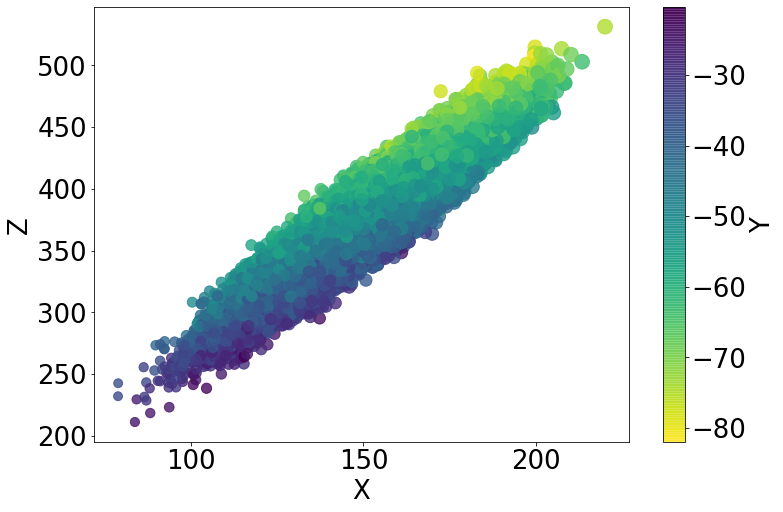

In [3]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,0.005240,0.005451,-0.007601,0.147125
Q,0.005240,1.000000,0.948533,-0.708974,0.914665
X,0.005451,0.948533,1.000000,-0.672619,0.934597
Y,-0.007601,-0.708974,-0.672619,1.000000,-0.846960
Z,0.147125,0.914665,0.934597,-0.846960,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 2.498e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:18:55   Log-Likelihood:            -1.9891e+05
No. Observations:              100000   AIC:                         3.978e+05
Df Residuals:                   99995   BIC:                         3.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0001      0.004      0.028      0.9

In [6]:
residuals

,P,Q,X,Y,Z
0,0.209198,0.798896,-2.373254,-0.173511,2.112438
1,-0.647804,-1.160246,-0.202553,1.102866,2.962201
2,1.717904,0.152398,3.516393,-3.946198,-9.434431
3,2.526046,-0.441949,0.687234,-1.655414,-2.602573
4,1.698119,-2.191937,3.695988,-0.785382,-3.270015
...,...,...,...,...,...
99995,-0.681932,-0.239222,2.244481,-1.168358,-4.168110
99996,-1.178243,-1.547600,1.021571,1.595788,2.788348
99997,-0.288241,-1.198980,-0.854013,0.435336,2.644370
99998,-1.675317,-1.725222,1.070756,-0.663794,0.488996


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.14,-0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,-0.00,0.83,-0.89,1.00


In [8]:
# !pip install pinguoin

In [9]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.14,-0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,-0.00,0.83,-0.89,1.00


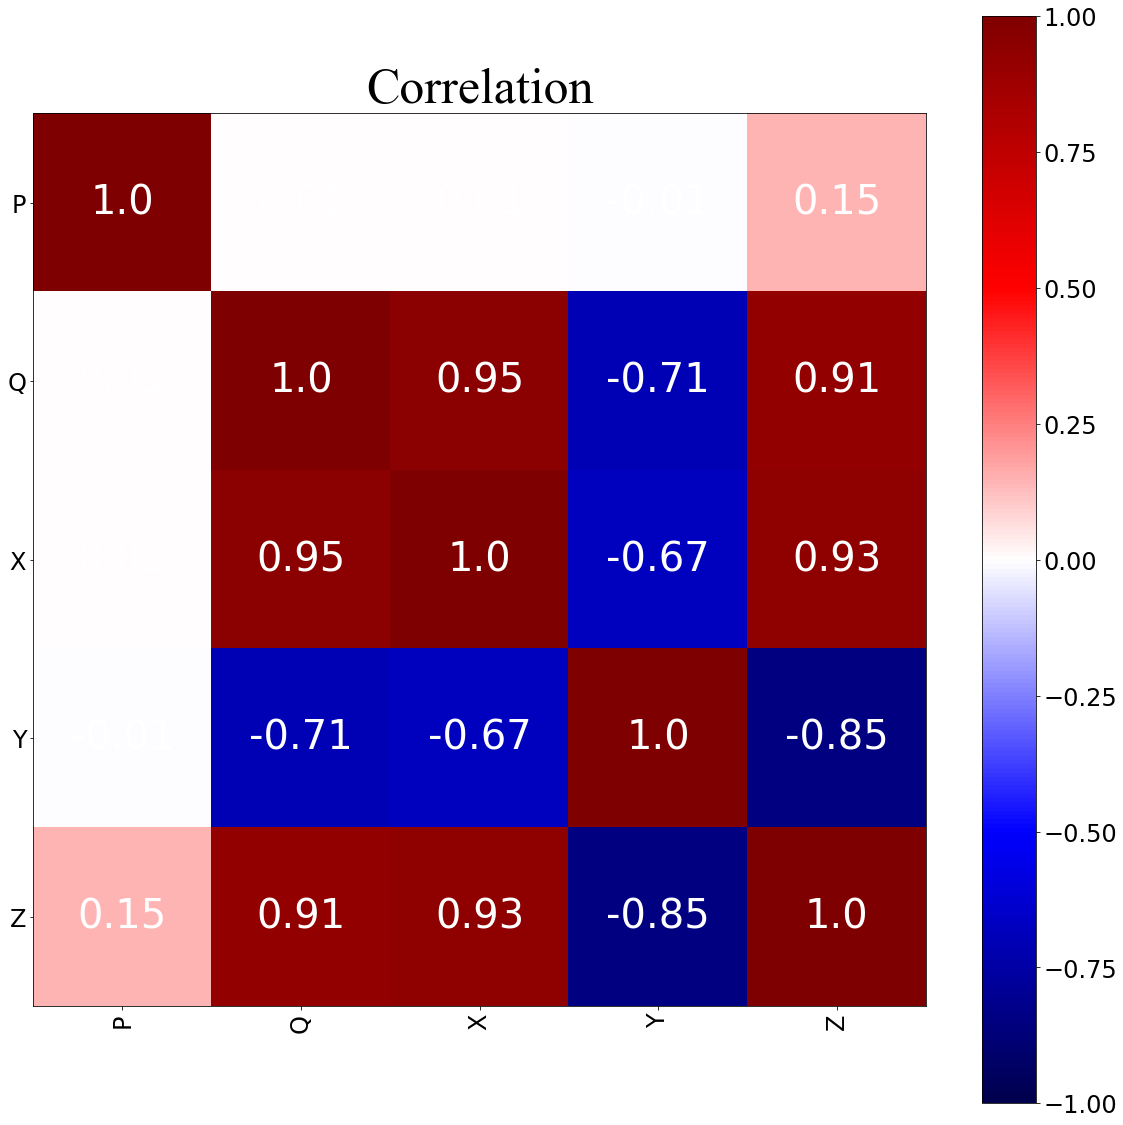

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")


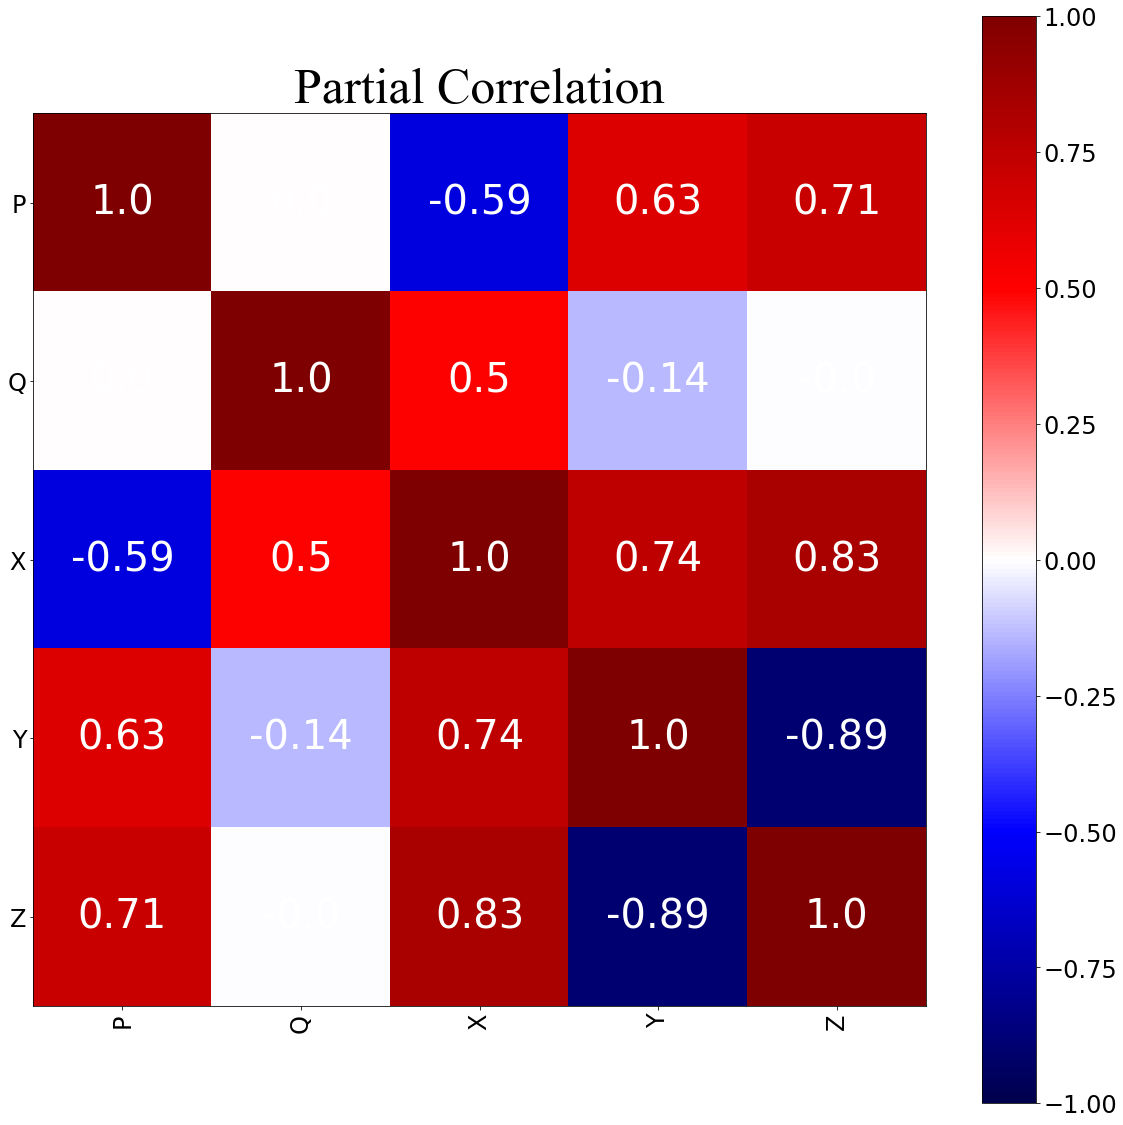

In [11]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")


In [12]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                          0.0007642
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                       0.978
Time:                        12:19:04   Log-Likelihood:                     -1.9891e+05
No. Observations:              100000   AIC:                                  3.978e+05
Df Residuals:                   99999   BIC:                                  3.978e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      X   R-squared (uncentered):                   0.252
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                          3.368e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:19:04   Log-Likelihood:                     -2.2935e+05
No. Observations:              100000   AIC:                                  4.587e+05
Df Residuals:                   99999   BIC:                                  4.587e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                          1.242e+05
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        12:19:05   Log-Likelihood:                     -1.8194e+05
No. Observations:              100000   AIC:                                  3.639e+05
Df Residuals:                   99999   BIC:                                  3.639e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.98,0.0,0.0,0.00
Q,0.98,NaN,0.0,0.0,0.62
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.62,0.0,0.0,NaN


In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        c_used = copy.copy(controls_used)
        for c_var in control_vars:
            if y in undirected_graph[x]:
                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    print(edges)
    print(edge_labels)
    
    
    graph.add_edges_from(edges)

graph_DAG(undirected_graph, df)

[('P', 'Z'), ('Q', 'X'), ('Q', 'Y'), ('X', 'Z'), ('Y', 'Z')]
{('P', 'Z'): '0.71', ('Q', 'X'): '0.5', ('Q', 'Y'): '-0.14', ('X', 'Z'): '0.83', ('Y', 'Z'): '-0.89'}
